# Pandas!

Pandas is a Python module for data analysis.  The central feature of Pandas is a data frame object.  Data frames are useful objects for analyzing and manipulating tabular data.  Think of a spreadsheet on steriods!  The R programming language features a build in data frame class.  In fact, data frames are the fundamental thing to work with in R.  Newer versions of Matlab have the `table` class, which implements some of the functionality available in the Pandas and R data frames.

From the [Pandas](http://pandas.pydata.org/) website:

* A fast and efficient DataFrame object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats: CSV and text files, Microsoft Excel, SQL databases, and the fast HDF5 format;
* Intelligent data alignment and integrated handling of missing data: gain automatic label-based alignment in computations and easily manipulate messy data into an orderly form;
* Flexible reshaping and pivoting of data sets;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Columns can be inserted and deleted from data structures for size mutability;
* Aggregating or transforming data with a powerful group by engine allowing split-apply-combine operations on data sets;
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging. Even create domain-specific time offsets and join time series without losing data;
* Highly optimized for performance, with critical code paths written in Cython or C.
* Python with pandas is in use in a wide variety of academic and commercial domains, including Finance, Neuroscience, Economics, Statistics, Advertising, Web Analytics, and more.

First we must import pandas.  The conventional way to do so is shown below:
telling special jupyter commands (ones that start with %) on how you want the plot to show up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Import data

Let's look to see what is in this directory with a "magic" Jupyter command:

In [2]:
%ls

column-glossary.md  lecture-12.ipynb    nba-2015.csv


Ahh, we have a `csv` file.  This is very easy to open in Pandas.  Pandas can also open many other data types.

See:  <http://pandas.pydata.org/pandas-docs/version/0.17.0/io.html>

Specifically, it is very easy to load data from MS Excel files (`pd.read_excel()`).

We have some basketball data from: <http://www.basketball-reference.com/>

below returns data frame object "nba"
head prints the first 10 rows of the data file

In [3]:
nba = pd.read_csv("nba-2015.csv")
#This takes the first row as the header by default 
#can do pd.read_csv("nba-2015.csv",header=None) to get columns labeled numerically

Let's inspect the data with the `head` method:

Pandas figures out how to separate data into rows and columns and automatically knows the first row is a header

In [6]:
nba.head(10)


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Quincy Acy,PF,24,NYK,68,22,1287,152,331,...,0.784,79,222,301,68,27,22,60,147,398
1,2,Jordan Adams,SG,20,MEM,30,0,248,35,86,...,0.609,9,19,28,16,16,7,14,24,94
2,3,Steven Adams,C,21,OKC,70,67,1771,217,399,...,0.502,199,324,523,66,38,86,99,222,537
3,4,Jeff Adrien,PF,28,MIN,17,0,215,19,44,...,0.579,23,54,77,15,4,9,9,30,60
4,5,Arron Afflalo,SG,29,TOT,78,72,2502,375,884,...,0.843,27,220,247,129,41,7,116,167,1035
5,5,Arron Afflalo,SG,29,DEN,53,53,1750,281,657,...,0.841,21,159,180,101,32,5,83,108,771
6,5,Arron Afflalo,SG,29,POR,25,19,752,94,227,...,0.851,6,61,67,28,9,2,33,59,264
7,6,Alexis Ajinca,C,26,NOP,68,8,957,181,329,...,0.818,104,211,315,47,21,51,69,151,443
8,7,Furkan Aldemir,PF,23,PHI,41,9,540,40,78,...,0.481,78,98,176,28,17,16,17,96,93
9,8,Cole Aldrich,C,26,NYK,61,16,976,144,301,...,0.781,101,237,338,75,37,65,59,122,338


In [7]:
nba.shape #tells us how many rows and columns are in data set

(651, 30)

### Exercise:
Modify the call to the `head` method to show more or fewer rows.

The output above does not show all of the columns!  We can inspect the set of columns in a Pandas data fram by looking at the `columns` attribute.

u means python unicode string

In [11]:
nba.columns

Index([u'Rk', u'Player', u'Pos', u'Age', u'Tm', u'G', u'GS', u'MP', u'FG',
       u'FGA', u'FG%', u'3P', u'3PA', u'3P%', u'2P', u'2PA', u'2P%', u'eFG%',
       u'FT', u'FTA', u'FT%', u'ORB', u'DRB', u'TRB', u'AST', u'STL', u'BLK',
       u'TOV', u'PF', u'PTS'],
      dtype='object')

### Exercise
Write a loop to nicely print out the column headers.

In [14]:
for column in nba.columns:
    print column

Rk
Player
Pos
Age
Tm
G
GS
MP
FG
FGA
FG%
3P
3PA
3P%
2P
2PA
2P%
eFG%
FT
FTA
FT%
ORB
DRB
TRB
AST
STL
BLK
TOV
PF
PTS


## Column glossary

In many data sets, a code is use for column headers.  It is important to know about the data you are working with.  Here is what the columns in this dataset mean:

```
| Rk     |                                 |
| Player |                                 |
| Pos    | Position                        |
| Age    |                                 |
| Tm     | Team                            |
| G      | Games                           |
| GS     | Games started                   |
| MP     | Minutes played                  |
| FG     | Field goals                     |
| FGA    | Field goals attempted           |
| FG%    | Field goal percentage           |
| 3P     | 3 pt field goals                |
| 3PA    | 3 pt field goals attempted      |
| 3P     | 3 pt field goal percentace      |
| 2P     | 2 pt field goals                |
| 2PA    | 2 pt field goals attempted      |
| 2P     | 2 pt field goals percentage     |
| eFG%   | effective field goal percentage |
| FT     | Free throws                     |
| FTA    | Free throws attempted           |
| FT%    | Free throw percentage           |
| ORB    | Offensive rebounds              |
| DRB    | Defenseive rebounds             |
| TRB    | Total rebounds                  |
| AST    | Assists                         |
| STL    | Steals                          |
| BLK    | Blocks                          |
| TOV    | Turnovers                       |
| PF     | Personal fouls                  |
| PTS    | Total points                    |
```

In [16]:
nba.info() #651 non null entries; tells you if there is a missing value; also gives data type
           # object refers to python object, or a string

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 0 to 650
Data columns (total 30 columns):
Rk        651 non-null int64
Player    651 non-null object
Pos       651 non-null object
Age       651 non-null int64
Tm        651 non-null object
G         651 non-null int64
GS        651 non-null int64
MP        651 non-null int64
FG        651 non-null int64
FGA       651 non-null int64
FG%       649 non-null float64
3P        651 non-null int64
3PA       651 non-null int64
3P%       570 non-null float64
2P        651 non-null int64
2PA       651 non-null int64
2P%       647 non-null float64
eFG%      649 non-null float64
FT        651 non-null int64
FTA       651 non-null int64
FT%       626 non-null float64
ORB       651 non-null int64
DRB       651 non-null int64
TRB       651 non-null int64
AST       651 non-null int64
STL       651 non-null int64
BLK       651 non-null int64
TOV       651 non-null int64
PF        651 non-null int64
PTS       651 non-null int64
dtypes: floa

In [17]:
nba.describe() #gives summary statistics 

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,649.000000,651.000000,651.000000,...,626.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000
mean,256.520737,26.500768,45.960061,21.099846,1041.775730,160.778802,359.763441,0.427404,33.917051,97.419355,...,0.722800,46.414747,137.298003,183.712750,95.960061,33.367127,20.072197,59.511521,87.199693,428.067588
std,143.081604,4.110914,25.503151,25.932412,806.253103,148.971531,322.834979,0.100285,44.168306,118.003315,...,0.154606,56.505820,130.956177,181.471919,116.919926,31.720880,29.058392,55.845731,64.768084,401.564362
min,1.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,130.500000,23.000000,24.000000,0.000000,272.000000,33.500000,80.500000,0.389000,1.000000,5.000000,...,0.650500,8.000000,31.000000,40.000000,15.000000,8.000000,2.000000,13.500000,26.000000,90.000000
50%,262.000000,26.000000,48.000000,9.000000,896.000000,120.000000,285.000000,0.426000,13.000000,43.000000,...,0.750000,27.000000,106.000000,138.000000,57.000000,26.000000,10.000000,46.000000,77.000000,308.000000
75%,381.500000,29.000000,70.000000,35.000000,1674.000000,251.000000,535.500000,0.472000,55.000000,165.000000,...,0.825000,61.500000,196.500000,262.000000,132.500000,48.000000,23.000000,90.500000,137.000000,658.000000
max,492.000000,38.000000,83.000000,82.000000,2981.000000,659.000000,1471.000000,1.000000,286.000000,646.000000,...,1.000000,437.000000,829.000000,1226.000000,838.000000,163.000000,200.000000,321.000000,285.000000,2217.000000


## Indexing

```
| Operation                      | Syntax        | Result    |
|--------------------------------+---------------+-----------|
| Select column                  | df[col]       | Series    |
| Select row by label            | df.loc[label] | Series    |
| Select row by integer location | df.iloc[loc]  | Series    |
| Slice rows                     | df[5:10]      | DataFrame |
| Select rows by boolean vector  | df[bool_vec]  | DataFrame |
```

* A *Series* object is a single column in the table
* A *DataFrame* object is the table 

### Column selection

In [18]:
# extract a single column with column index name
nba['Player'].head()

0       Quincy Acy
1     Jordan Adams
2     Steven Adams
3      Jeff Adrien
4    Arron Afflalo
Name: Player, dtype: object

In [19]:
nba['Player'] #can select and individual column

0                 Quincy Acy
1               Jordan Adams
2               Steven Adams
3                Jeff Adrien
4              Arron Afflalo
5              Arron Afflalo
6              Arron Afflalo
7              Alexis Ajinca
8             Furkan Aldemir
9               Cole Aldrich
10         LaMarcus Aldridge
11               Lavoy Allen
12                Tony Allen
13           Al-Farouq Aminu
14              Lou Amundson
15              Lou Amundson
16              Lou Amundson
17            Chris Andersen
18             Alan Anderson
19             Kyle Anderson
20             Ryan Anderson
21     Giannis Antetokounmpo
22           Carmelo Anthony
23              Joel Anthony
24                Pero Antic
25              Trevor Ariza
26            Darrell Arthur
27                 Omer Asik
28             D.J. Augustin
29             D.J. Augustin
               ...          
621         Derrick Williams
622          Elliot Williams
623          Elliot Williams
624          E

In [22]:
nba['PTS'].head()

0     398
1      94
2     537
3      60
4    1035
Name: PTS, dtype: int64

In [21]:
# select several columns by passing a sequence of column names
# (this returns a data frame)
nba[['Player','PTS']].head()

,Player,PTS
0,Quincy Acy,398
1,Jordan Adams,94
2,Steven Adams,537
3,Jeff Adrien,60
4,Arron Afflalo,1035


### Row selection

Currently all row labels in this data set are integers, so row access via `nba.loc` and `nba.iloc` are equivalent.

In [20]:
nba.loc[100] #this gives row 100, which gives us Vince Carter, can see his stats

Rk                  85
Player    Vince Carter
Pos                 SG
Age                 38
Tm                 MEM
G                   66
GS                   1
MP                1091
FG                 135
FGA                406
FG%              0.333
3P                  69
3PA                232
3P%              0.297
2P                  66
2PA                174
2P%              0.379
eFG%             0.417
FT                  45
FTA                 57
FT%              0.789
ORB                 27
DRB                106
TRB                133
AST                 79
STL                 43
BLK                 14
TOV                 43
PF                 102
PTS                384
Name: 100, dtype: object

In [23]:
# select multiple rows with an integer index slice
nba[200:205]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
200,160,Joel Freeland,C,27,POR,48,8,617,74,151,...,0.840,62,129,191,16,9,23,23,93,169
201,161,Channing Frye,PF,31,ORL,75,51,1870,191,487,...,0.886,27,266,293,94,47,39,78,191,549
202,162,Danilo Gallinari,SF,26,DEN,59,27,1426,228,568,...,0.895,31,187,218,83,47,20,57,94,734
203,163,Langston Galloway,PG,23,NYK,45,41,1457,204,511,...,0.808,37,153,190,150,52,12,61,129,533
204,164,Francisco Garcia,SF,33,HOU,14,0,200,17,63,...,0.250,3,14,17,15,9,5,10,20,45


In [24]:
# we can compute a boolean series with python inequality operators
(nba['PTS'] >= 1000).head(10) #return true for all rows of points column 
                              #that has point value specified, then print out the top ten

0    False
1    False
2    False
3    False
4     True
5    False
6    False
7    False
8    False
9    False
Name: PTS, dtype: bool

In [30]:
# we can select all rows that pass a filter 
nba[nba['PTS'] >= 1800] #pass in boolean; return only players who scored >=1800 over the season

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
135,112,Stephen Curry,PG,26,GSW,80,80,2613,653,1341,...,0.914,56,285,341,619,163,16,249,158,1900
249,197,James Harden,SG,25,HOU,81,81,2981,647,1470,...,0.868,75,384,459,565,154,60,321,208,2217
615,470,Russell Westbrook,PG,26,OKC,67,67,2302,627,1471,...,0.835,124,364,488,574,140,14,293,184,1886


## Column modifications

In [31]:
# let's create a new column
nba['ASB'] = nba['AST'] + nba['STL'] + nba['BLK']
nba.head() #tacks on extra columns to the end

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ASB
0,1,Quincy Acy,PF,24,NYK,68,22,1287,152,331,...,79,222,301,68,27,22,60,147,398,117
1,2,Jordan Adams,SG,20,MEM,30,0,248,35,86,...,9,19,28,16,16,7,14,24,94,39
2,3,Steven Adams,C,21,OKC,70,67,1771,217,399,...,199,324,523,66,38,86,99,222,537,190
3,4,Jeff Adrien,PF,28,MIN,17,0,215,19,44,...,23,54,77,15,4,9,9,30,60,28
4,5,Arron Afflalo,SG,29,TOT,78,72,2502,375,884,...,27,220,247,129,41,7,116,167,1035,177


In [32]:
# let's delete the column we just made
del nba['ASB']
nba.head()


,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Quincy Acy,PF,24,NYK,68,22,1287,152,331,...,0.784,79,222,301,68,27,22,60,147,398
1,2,Jordan Adams,SG,20,MEM,30,0,248,35,86,...,0.609,9,19,28,16,16,7,14,24,94
2,3,Steven Adams,C,21,OKC,70,67,1771,217,399,...,0.502,199,324,523,66,38,86,99,222,537
3,4,Jeff Adrien,PF,28,MIN,17,0,215,19,44,...,0.579,23,54,77,15,4,9,9,30,60
4,5,Arron Afflalo,SG,29,TOT,78,72,2502,375,884,...,0.843,27,220,247,129,41,7,116,167,1035


## Simple plotting

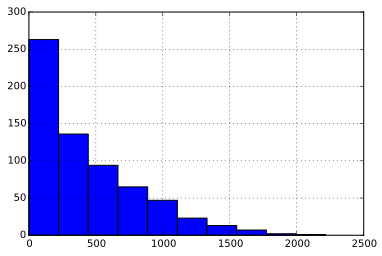

In [33]:
# histogram of single column; by default, gives 10 bins
nba['PTS'].hist()

#if running from terminal, save as a a file extension .png
#import matplotlib.pylab as plt
#plt.show() 

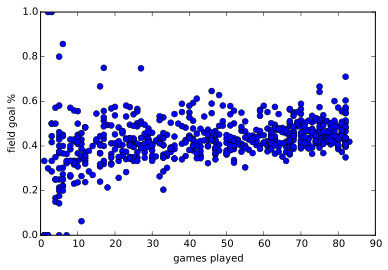

In [42]:
# scatter plot of two columns
plt.plot(nba['G'],nba['FG%'],'o',alpha=0.2)
plt.xlabel('games played')
plt.ylabel('field goal %')

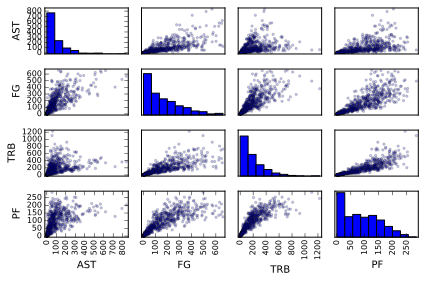

In [41]:
# scatter matrix of multiple columns
pd.tools.plotting.scatter_matrix(nba[['AST','FG','TRB','PF']], alpha=0.2)
plt.tight_layout()

## Grouping and aggregation

In this data set, a player may have multiple rows based on teams they played for during the year.  Let's get the total points for all players.

In [46]:
player_pts = nba[['Player','PTS']].groupby('Player').agg({'PTS':np.sum})
# this is an example of "method chaining"
# first part selects data
# groupby groups by the player
# then, we want to aggregate and pass a dictionary telling us what to do with the aggregate

#groupby returns an object
#only the groupby object has an aggregate (agg) method

In [48]:
player_pts.head(10)

,PTS
Player,
A.J. Price,266
Aaron Brooks,954
Aaron Gordon,243
Adreian Payne,426
Al Horford,1156
Al Jefferson,1082
Al-Farouq Aminu,412
Alan Anderson,545
Alec Burks,374


In [49]:
player_pts.loc['Arron Afflalo']

PTS    2070
Name: Arron Afflalo, dtype: int64

In [50]:
nba[nba['Player'] == 'Arron Afflalo'] #number of points he scored for each individual team

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
4,5,Arron Afflalo,SG,29,TOT,78,72,2502,375,884,...,0.843,27,220,247,129,41,7,116,167,1035
5,5,Arron Afflalo,SG,29,DEN,53,53,1750,281,657,...,0.841,21,159,180,101,32,5,83,108,771
6,5,Arron Afflalo,SG,29,POR,25,19,752,94,227,...,0.851,6,61,67,28,9,2,33,59,264


## Exercises

List players who have played for more than one team. (Hint: use the `count()` method on the object returned from `groupby`)

What is the max number of teams any player has played for?

In [62]:
nba[['Player','Tm']].groupby('Player').count()

,Tm
Player,
A.J. Price,4
Aaron Brooks,1
Aaron Gordon,1
Adreian Payne,3
Al Horford,1
Al Jefferson,1
Al-Farouq Aminu,1
Alan Anderson,1
Alec Burks,1


What is the highest scoring team?
What is the lowest scoring team?

In [75]:
a = nba[['Player','Tm']].groupby('Player').count()
b=max(a['Tm'])

a[a['Tm'] == b]


,Tm
Player,
A.J. Price,4
Alexey Shved,4
Brandan Wright,4
Chris Johnson,4
Jameer Nelson,4
Tayshaun Prince,4
Troy Daniels,4


What is highest scoring position?  What is lowest scoring position?  How many players in each position?  What is average score per position?

In [93]:
#team has highest variance of points scored by individual players? 
nba[['Tm','PTS']].groupby('Tm').std()


,PTS
Tm,
ATL,427.582034
BOS,337.913998
BRK,403.678430
CHI,454.934587
CHO,332.499480
CLE,523.805435
DAL,439.522834
DEN,348.588885
DET,361.872655


More questions:
* Is there a correlation between fouls and rebounds?  What if we normalize by minutes played?
* What player has the most points per minute played?
* Plot a histogram of minutes played for players?
* What team has the highest variance of points scored by individual players?
* What team has the lowest variance of points scored by individual players?

## References

* **Python for Data Analysis** by Wes McKinney (2012)  
  <http://proquest.safaribooksonline.com/book/programming/python/9781449323592/firstchapter>
* Pandas online documentation:  
  <http://pandas.pydata.org/pandas-docs/stable>